In [ ]:
# we can start coding here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier


# Set Pandas display options to show all columns and rows
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/Shareddrives/Humana_mays_Competetion/Data/"

Mounted at /content/drive


In [ ]:
df = pd.read_csv(data_path+"Training_1006.csv")
print(df.shape)
print(df.columns)
df.head(5)

df_holdout = pd.read_csv(data_path+"Holdout_1006.csv")
print(df_holdout.shape)
print(df_holdout.columns)
df_holdout.head(5)

(1232, 58)
Index(['therapy_id', 'tgt_ade_dc_ind', 'race_cd', 'est_age', 'sex_cd',
       'cms_disabled_ind', 'cms_low_income_ind', 'rx_claims',
       'unique_ndc_id_cnt', 'pay_day_supply_cnt_avg', 'rx_cost_sum',
       'tot_drug_cost_accum_amt_max', 'reversal_ind_sum', 'mail_order_ind_sum',
       'generic_ind_sum', 'maint_ind_sum', 'specialty_ind_sum',
       'n_rx_claims_bfr', 'n_rx_claims_aftr', 'pay_day_supply_cnt_avg_bfr',
       'pay_day_supply_cnt_avg_aftr', 'pay_day_supply_cnt_sum_bfr',
       'pay_day_supply_cnt_sum_aftr', 'rx_cost_sum_bfr',
       'rx_cost_sum_aftr_thrpy', 'reversal_ind_sum_bfr',
       'reversal_ind_sum_aftr', 'mail_order_ind_sum_bfr',
       'mail_order_ind_sum_aftr_thrpy_strt', 'generic_ind_sum_bfr_thrpy_strt',
       'generic_ind_sum_aftr', 'maint_ind_sum_bfr',
       'maint_ind_sum_aft_thrpy_strt', 'specialty_ind_sum_bfr',
       'specialty_ind_sum_aftr_thrpy_strt', 'rxclms_duration',
       'ddi_aftr_ratio', 'anticoag_prop_aftr_thrpy_strt',
       'dia

,id,therapy_id,race_cd,est_age,sex_cd,cms_disabled_ind,cms_low_income_ind,rx_claims,unique_ndc_id_cnt,pay_day_supply_cnt_avg,rx_cost_sum,tot_drug_cost_accum_amt_max,reversal_ind_sum,mail_order_ind_sum,generic_ind_sum,maint_ind_sum,specialty_ind_sum,n_rx_claims_bfr,n_rx_claims_aftr,pay_day_supply_cnt_avg_bfr,pay_day_supply_cnt_avg_aftr,pay_day_supply_cnt_sum_bfr,pay_day_supply_cnt_sum_aftr,rx_cost_sum_bfr,rx_cost_sum_aftr_thrpy,reversal_ind_sum_bfr,reversal_ind_sum_aftr,mail_order_ind_sum_bfr,mail_order_ind_sum_aftr_thrpy_strt,generic_ind_sum_bfr_thrpy_strt,generic_ind_sum_aftr,maint_ind_sum_bfr,maint_ind_sum_aft_thrpy_strt,specialty_ind_sum_bfr,specialty_ind_sum_aftr_thrpy_strt,rxclms_duration,ddi_aftr_ratio,anticoag_prop_aftr_thrpy_strt,diarrhea_aftr_ratio,nausea_prop_aftr_thrpy_strt,seizure_aftr_ratio,med_claims,medclm_process_time_avg,medclms_duration,ade_diagnosis_prop_aftr_thrpy_strt,seizure_diagnosis_ratio,pain_diagnosis_ratio,fatigue_diagnosis_prop_aftr_thrpy_strt,nausea_diagnosis_prop_aftr_thrpy_strt,hyperglycemia_diagnosis_prop_aftr_thrpy_strt,constipation_diagnosis_prop_aftr_thrpy_strt,diarrhea_diagnosis_ratio,service_date_fst_start,service_date_last_from_thrpy_strt,visit_date_fst_from_thrpy_strt,visit_date_lst_from_thrpy_strt,process_date_fst_start,process_date_lst_start
0,1018450235,1018450235-TAGRISSO-1,5.0,75.0,F,0.0,0.0,21.0,17.0,36.904762,30975.02,57625.40,0.0,4.0,15.0,12.0,2.0,9.0,11.0,14.285714,21.190476,300.0,445.0,365.53,15571.36,0.0,0.0,2.0,2.0,8.0,7.0,4.0,8.0,0.0,1.0,111.0,0.000000,0.999001,0.0,0.0,0.0,74.0,66.081081,-55.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,-76.0,35.0,-54.0,-109.0,-6.0,-54.0
1,1032849118,1032849118-TAGRISSO-1,1.0,91.0,F,0.0,0.0,17.0,10.0,66.000000,62873.54,78374.62,0.0,11.0,13.0,11.0,4.0,5.0,11.0,26.470588,37.764706,450.0,642.0,130.79,47086.98,0.0,0.0,5.0,6.0,5.0,8.0,5.0,6.0,0.0,3.0,174.0,0.999001,0.000000,0.0,0.0,0.0,157.0,20.968153,10.0,0.999987,0.0,0.0,0.999987,0.0,0.0,0.999001,0.0,-63.0,111.0,76.0,86.0,91.0,100.0
2,1044251683,1044251683-TAGRISSO-1,1.0,72.0,F,0.0,1.0,37.0,25.0,28.108108,67417.64,51822.31,0.0,4.0,30.0,14.0,4.0,21.0,15.0,13.432432,13.864865,497.0,513.0,866.13,50278.45,0.0,0.0,2.0,2.0,19.0,11.0,8.0,6.0,0.0,3.0,192.0,0.000000,0.000000,0.0,0.0,0.0,301.0,39.425249,-38.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,-88.0,104.0,31.0,-7.0,36.0,6.0
3,1086171816,1086171816-TAGRISSO-1,1.0,67.0,F,0.0,1.0,30.0,21.0,23.466667,17082.28,18987.38,0.0,1.0,27.0,19.0,4.0,25.0,4.0,18.466667,4.000000,554.0,120.0,1026.45,101.85,0.0,0.0,1.0,0.0,23.0,4.0,15.0,4.0,2.0,1.0,95.0,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90.0,5.0,NaN,NaN,NaN,NaN
4,1093074743,1093074743-TAGRISSO-1,1.0,67.0,M,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['race_cd'].value_counts()

1.0    699
4.0    152
2.0    145
0.0     84
5.0     42
3.0     37
6.0      5
Name: race_cd, dtype: int64

In [ ]:
#dropping id variable
df.drop(['therapy_id'],axis=1,inplace=True) #,'ade_diagnosis_sum'

#drop disparity variables
df.drop(['race_cd','sex_cd'],axis=1,inplace=True) #,'est_age','cms_disabled_ind','cms_low_income_ind'


# drop unnecessary variables
id = df_holdout['id'].values
df_holdout.drop(['id','therapy_id'],axis=1,inplace=True)

df_holdout.drop(['race_cd','sex_cd'],axis=1,inplace=True) #,'est_age','cms_disabled_ind','cms_low_income_ind'

## Correlation heatmap

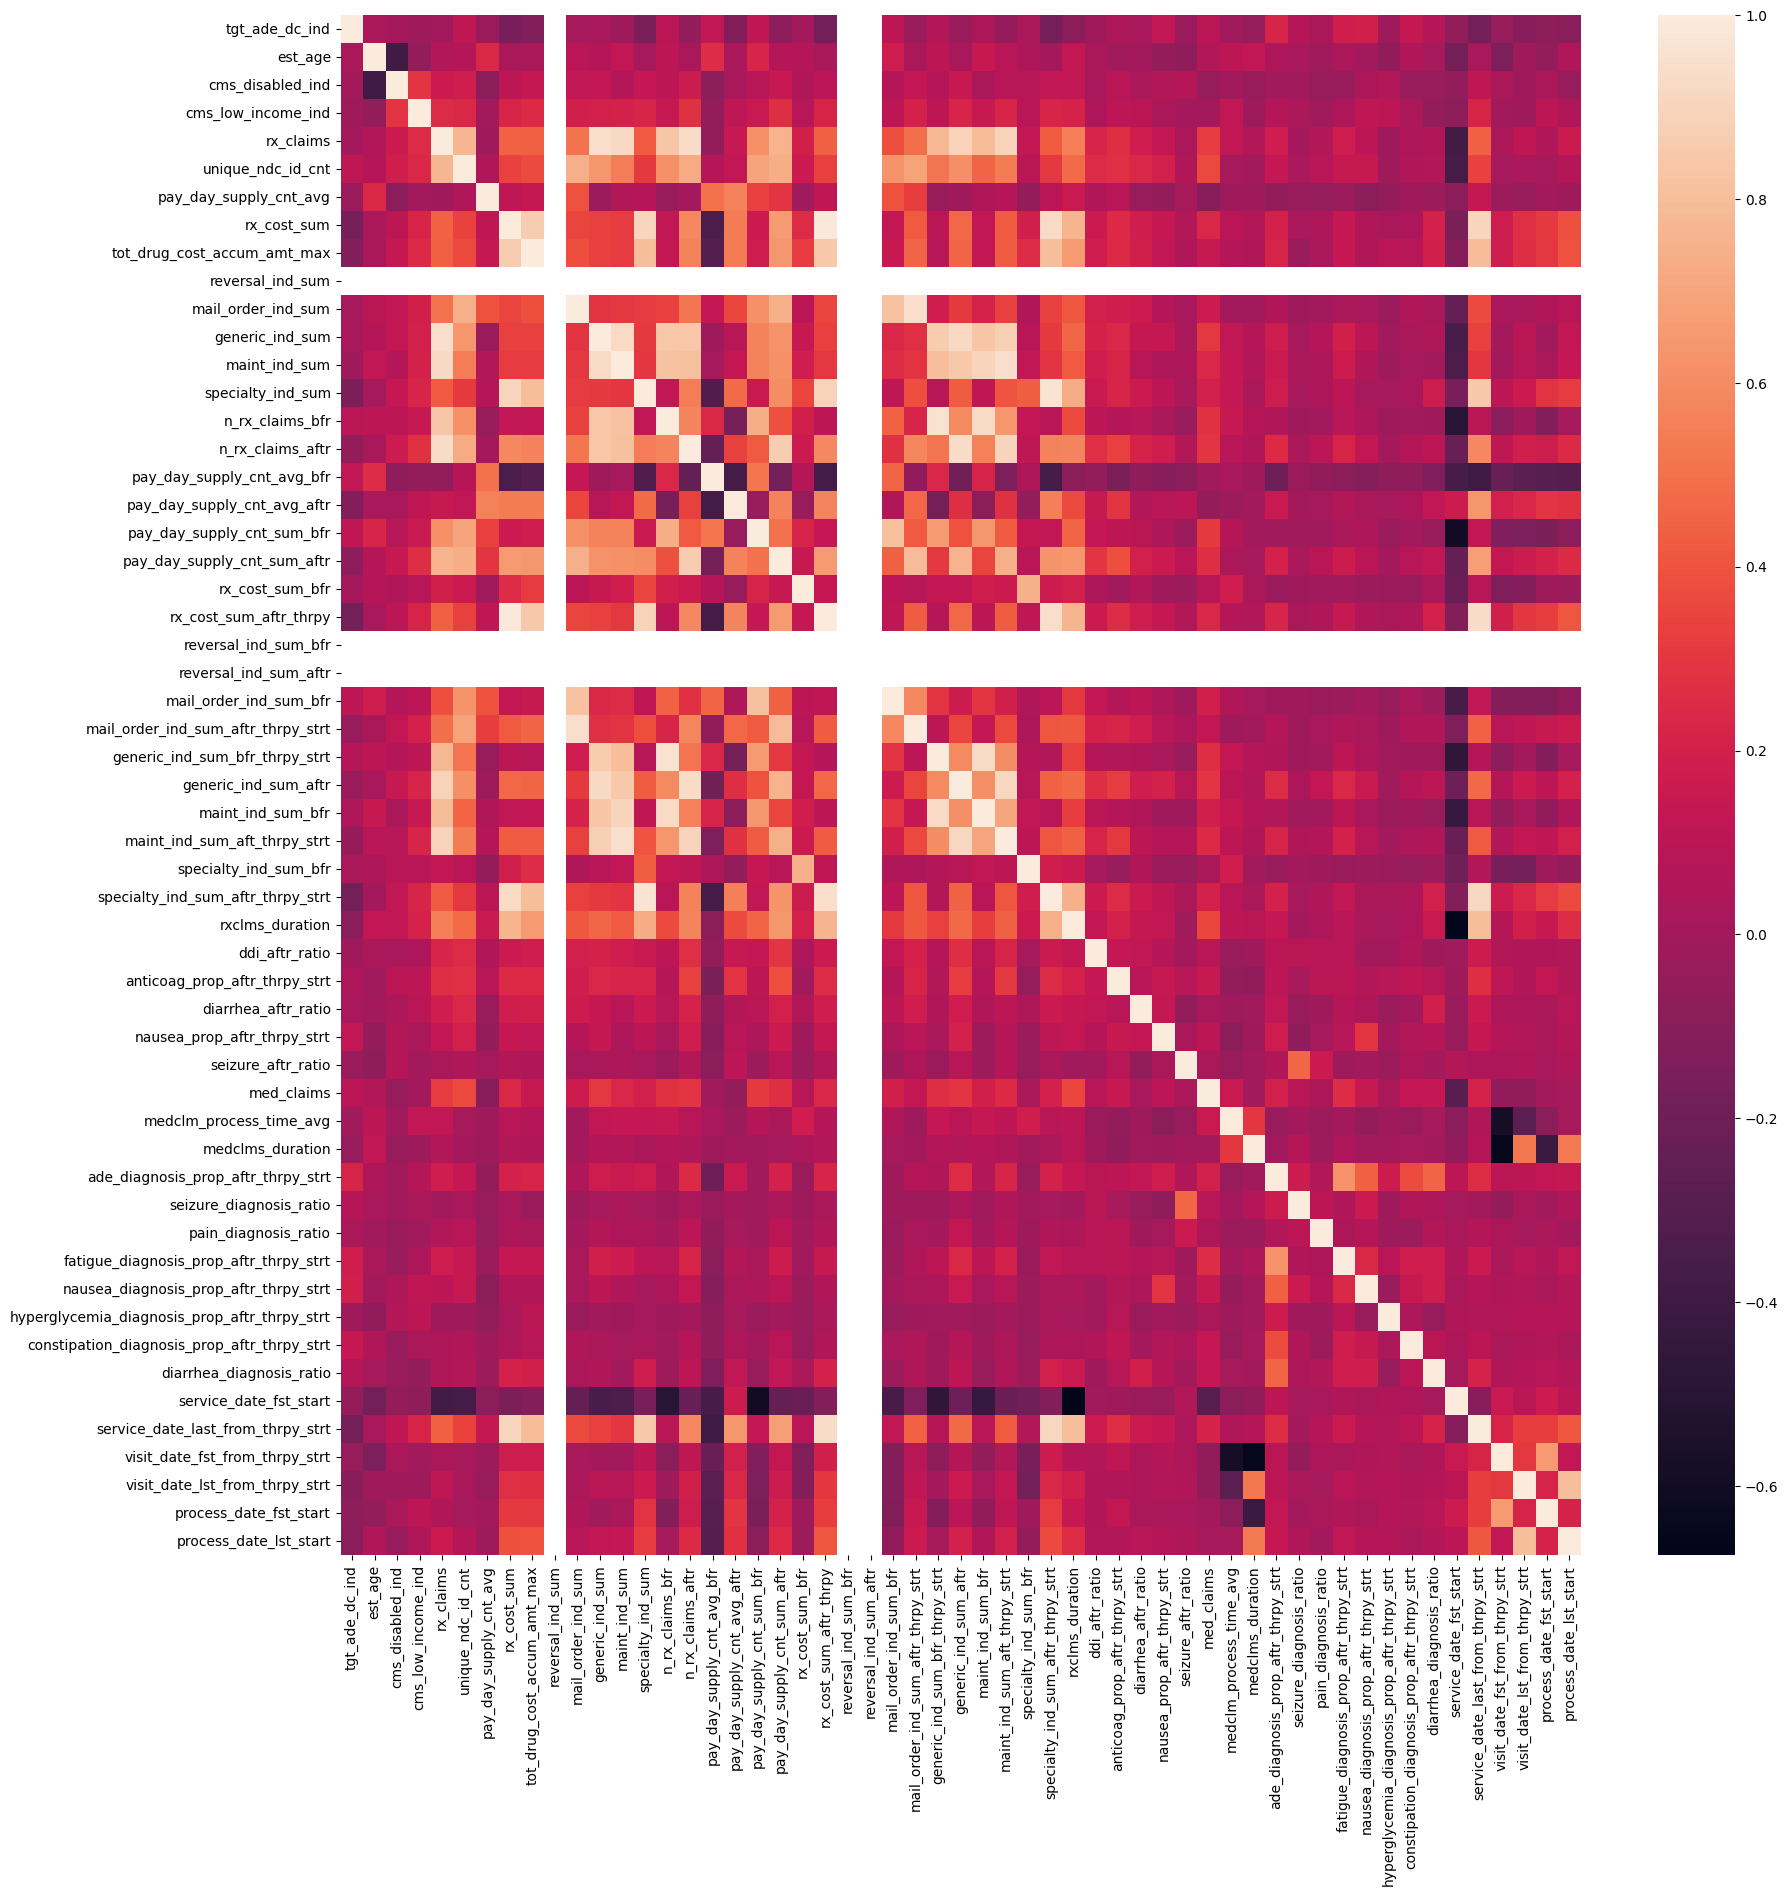

In [ ]:
plt.figure(figsize=(20,20))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix)
plt.show()

## Handle Missing Values

In [ ]:
######################################    TRAIN    ###################################
cols_to_impute = [col for col in df.columns if df[col].isna().sum()>0]
num_cols_to_impute = [col for col in df.columns if df[col].isna().sum()>0 and df[col].dtype != 'O']
cat_cols_to_impute = [col for col in df.columns if df[col].isna().sum()>0 and df[col].dtype == 'O']
print(cols_to_impute)
print(num_cols_to_impute)
print(cat_cols_to_impute)

# imputing with missing value indicators - simple imputer - numeric variables
from sklearn.impute import SimpleImputer
for col in num_cols_to_impute:

  ############ -10000 with missing indicator  ############
  # imputer = SimpleImputer(strategy='constant', fill_value=-10000,add_indicator=True)
  # imputer = SimpleImputer(strategy='constant', fill_value=0,add_indicator=True)
  # imputer = SimpleImputer(strategy='mean',add_indicator=True)
  imputer = SimpleImputer(strategy='median',add_indicator=True)
  temp = imputer.fit_transform(df[col].values.reshape(-1,1))
  df[col] = temp[:,0]
  df[col+'_Missing'] = temp[:,1]
  temp2 = imputer.transform(df_holdout[col].values.reshape(-1,1))
  df_holdout[col] = temp2[:,0]
  df_holdout[col+'_Missing'] = temp2[:,1]


  # df[col] = df[col].fillna(0)
  # df_holdout[col] = df_holdout[col].fillna(0)


  # df[col] = df[col].fillna(-10000)
  # df_holdout[col] = df_holdout[col].fillna(-10000)

  # df[col] = df[col].fillna(df[col].mean())
  # df_holdout[col] = df_holdout[col].fillna(df_holdout[col].mean())

for col in cat_cols_to_impute:
  df[col] = df[col].fillna('Unknown')
  df_holdout[col] = df_holdout[col].fillna('Unknown')


['est_age', 'cms_disabled_ind', 'cms_low_income_ind', 'rx_claims', 'unique_ndc_id_cnt', 'pay_day_supply_cnt_avg', 'rx_cost_sum', 'tot_drug_cost_accum_amt_max', 'reversal_ind_sum', 'mail_order_ind_sum', 'generic_ind_sum', 'maint_ind_sum', 'specialty_ind_sum', 'n_rx_claims_bfr', 'n_rx_claims_aftr', 'pay_day_supply_cnt_avg_bfr', 'pay_day_supply_cnt_avg_aftr', 'pay_day_supply_cnt_sum_bfr', 'pay_day_supply_cnt_sum_aftr', 'rx_cost_sum_bfr', 'rx_cost_sum_aftr_thrpy', 'reversal_ind_sum_bfr', 'reversal_ind_sum_aftr', 'mail_order_ind_sum_bfr', 'mail_order_ind_sum_aftr_thrpy_strt', 'generic_ind_sum_bfr_thrpy_strt', 'generic_ind_sum_aftr', 'maint_ind_sum_bfr', 'maint_ind_sum_aft_thrpy_strt', 'specialty_ind_sum_bfr', 'specialty_ind_sum_aftr_thrpy_strt', 'rxclms_duration', 'ddi_aftr_ratio', 'anticoag_prop_aftr_thrpy_strt', 'diarrhea_aftr_ratio', 'nausea_prop_aftr_thrpy_strt', 'seizure_aftr_ratio', 'med_claims', 'medclm_process_time_avg', 'medclms_duration', 'ade_diagnosis_prop_aftr_thrpy_strt', 'sei

<ipython-input-7-e07d319a543f>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col+'_Missing'] = temp[:,1]
<ipython-input-7-e07d319a543f>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_holdout[col+'_Missing'] = temp2[:,1]
<ipython-input-7-e07d319a543f>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fra

In [ ]:
print(df.shape)
# check if all the missing indicators are just same
missing_indicators = [col for col in df.columns if 'Missing' in col]
print(missing_indicators)
print(len(missing_indicators))


df_temp = df[missing_indicators].copy(deep=True)
df.drop(missing_indicators, axis=1, inplace=True)
#drop any duplicate missing indicator columns
df_temp = df_temp.T.drop_duplicates().T
df = pd.merge(df,df_temp,left_index=True,right_index=True)


df_temp_holdout = df_holdout[missing_indicators].copy(deep=True)
df_holdout.drop(missing_indicators, axis=1, inplace=True)
#drop any duplicate missing indicator columns
df_temp_holdout = df_temp_holdout.T.drop_duplicates().T
df_holdout = pd.merge(df_holdout,df_temp_holdout,left_index=True,right_index=True)


print(df.shape)
print(df_holdout.shape)

(1232, 109)
['est_age_Missing', 'cms_disabled_ind_Missing', 'cms_low_income_ind_Missing', 'rx_claims_Missing', 'unique_ndc_id_cnt_Missing', 'pay_day_supply_cnt_avg_Missing', 'rx_cost_sum_Missing', 'tot_drug_cost_accum_amt_max_Missing', 'reversal_ind_sum_Missing', 'mail_order_ind_sum_Missing', 'generic_ind_sum_Missing', 'maint_ind_sum_Missing', 'specialty_ind_sum_Missing', 'n_rx_claims_bfr_Missing', 'n_rx_claims_aftr_Missing', 'pay_day_supply_cnt_avg_bfr_Missing', 'pay_day_supply_cnt_avg_aftr_Missing', 'pay_day_supply_cnt_sum_bfr_Missing', 'pay_day_supply_cnt_sum_aftr_Missing', 'rx_cost_sum_bfr_Missing', 'rx_cost_sum_aftr_thrpy_Missing', 'reversal_ind_sum_bfr_Missing', 'reversal_ind_sum_aftr_Missing', 'mail_order_ind_sum_bfr_Missing', 'mail_order_ind_sum_aftr_thrpy_strt_Missing', 'generic_ind_sum_bfr_thrpy_strt_Missing', 'generic_ind_sum_aftr_Missing', 'maint_ind_sum_bfr_Missing', 'maint_ind_sum_aft_thrpy_strt_Missing', 'specialty_ind_sum_bfr_Missing', 'specialty_ind_sum_aftr_thrpy_strt

In [ ]:
df.isna().sum().sum()

0

## Label Encoding

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
print(cat_cols)
# for col in cat_cols:
#   label_encoder = LabelEncoder()
#   df[col] = label_encoder.fit_transform(df[col])
#   df_holdout[col] = label_encoder.transform(df_holdout[col])

[]


## Train Test split

In [ ]:
df.columns

Index(['tgt_ade_dc_ind', 'est_age', 'cms_disabled_ind', 'cms_low_income_ind',
       'rx_claims', 'unique_ndc_id_cnt', 'pay_day_supply_cnt_avg',
       'rx_cost_sum', 'tot_drug_cost_accum_amt_max', 'reversal_ind_sum',
       'mail_order_ind_sum', 'generic_ind_sum', 'maint_ind_sum',
       'specialty_ind_sum', 'n_rx_claims_bfr', 'n_rx_claims_aftr',
       'pay_day_supply_cnt_avg_bfr', 'pay_day_supply_cnt_avg_aftr',
       'pay_day_supply_cnt_sum_bfr', 'pay_day_supply_cnt_sum_aftr',
       'rx_cost_sum_bfr', 'rx_cost_sum_aftr_thrpy', 'reversal_ind_sum_bfr',
       'reversal_ind_sum_aftr', 'mail_order_ind_sum_bfr',
       'mail_order_ind_sum_aftr_thrpy_strt', 'generic_ind_sum_bfr_thrpy_strt',
       'generic_ind_sum_aftr', 'maint_ind_sum_bfr',
       'maint_ind_sum_aft_thrpy_strt', 'specialty_ind_sum_bfr',
       'specialty_ind_sum_aftr_thrpy_strt', 'rxclms_duration',
       'ddi_aftr_ratio', 'anticoag_prop_aftr_thrpy_strt',
       'diarrhea_aftr_ratio', 'nausea_prop_aftr_thrpy_strt',
   

In [ ]:
y = df['tgt_ade_dc_ind']
X = df.drop(['tgt_ade_dc_ind'],axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(862, 57) (862,)
(370, 57) (370,)


In [ ]:
((y_train==1).sum())/(y_train.shape[0])

0.0951276102088167

## Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
df_holdout = pd.DataFrame(scaler.transform(df_holdout),columns=df_holdout.columns)

## Data Balancing

In [ ]:
# #store list of categorical indices later for smoteNC
# categorical_indices = []
# for i, dtype in enumerate(X.dtypes):
#     if dtype == 'object':
#         categorical_indices.append(i)
# categorical_indices

# from imblearn.over_sampling import SMOTENC

# # Create an instance of SMOTENC
# smotenc = SMOTENC(sampling_strategy='auto', categorical_features=categorical_indices)

# # Apply SMOTENC to the dataset
# X_train, y_train = smotenc.fit_resample(X_train, y_train)
# print(y_train.value_counts())


In [ ]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)
print(y_train.value_counts())

1    780
0    780
Name: tgt_ade_dc_ind, dtype: int64


## Logistic Regression

In [ ]:
# from sklearn.model_selection import GridSearchCV
# # hyperparameter tuning on logistic regression
# logistic_regression = LogisticRegression(penalty='l1', solver='liblinear')

# # Define the hyperparameter grid to search over
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
# }

# # Create the grid search object
# grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, n_jobs=-1,  scoring='roc_auc')

# # Perform the grid search to find the best hyperparameters
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters found
# print("Best Hyperparameters: ", grid_search.best_params_)


In [ ]:
# Create and train a classifier
clf = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',C=0.06) #,penalty='l1', solver='liblinear',, C=0.05
clf.fit(X_train, y_train)

# Make predictions on the test set
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_train_pred_prob = clf.predict_proba(X_train)[:, 1]
y_test_pred_prob = clf.predict_proba(X_test)[:, 1]

# Evaluate the classifier
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

# Calculate ROC AUC score
roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)
roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)
print("ROC AUC Score:", roc_auc_train)
print("ROC AUC Score:", roc_auc_test)

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       780
           1       0.85      0.99      0.91       780

    accuracy                           0.91      1560
   macro avg       0.92      0.91      0.91      1560
weighted avg       0.92      0.91      0.91      1560

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       335
           1       0.36      0.91      0.52        35

    accuracy                           0.84       370
   macro avg       0.67      0.87      0.71       370
weighted avg       0.93      0.84      0.87       370

ROC AUC Score: 0.9568540433925049
ROC AUC Score: 0.9383368869936034


In [ ]:
# Get non-zero coefficients
non_zero_features_idx = np.where(clf.coef_[0] != 0)[0]

# Selecting the non-zero features from the original data
X_train_selected = X_train.iloc[:, non_zero_features_idx]
X_test_selected = X_test.iloc[:, non_zero_features_idx]

# Refit the model using only selected features
refit_lr = LogisticRegression(solver='liblinear', random_state=42)
refit_lr.fit(X_train_selected, y_train)

y_train_pred = refit_lr.predict(X_train_selected)
y_test_pred = refit_lr.predict(X_test_selected)

# Predict and Evaluate the refit model
# y_pred = refit_lr.predict(X_test_selected)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

y_train_pred_prob = refit_lr.predict_proba(X_train_selected)[:, 1]
y_test_pred_prob = refit_lr.predict_proba(X_test_selected)[:, 1]


# Calculate ROC AUC score
roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)
roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)
print("ROC AUC Score:", roc_auc_train)
print("ROC AUC Score:", roc_auc_test)

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       780
           1       0.88      0.96      0.92       780

    accuracy                           0.91      1560
   macro avg       0.92      0.91      0.91      1560
weighted avg       0.92      0.91      0.91      1560

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       335
           1       0.44      0.91      0.59        35

    accuracy                           0.88       370
   macro avg       0.71      0.90      0.76       370
weighted avg       0.94      0.88      0.90       370

ROC AUC Score: 0.9626988823142669
ROC AUC Score: 0.937228144989339


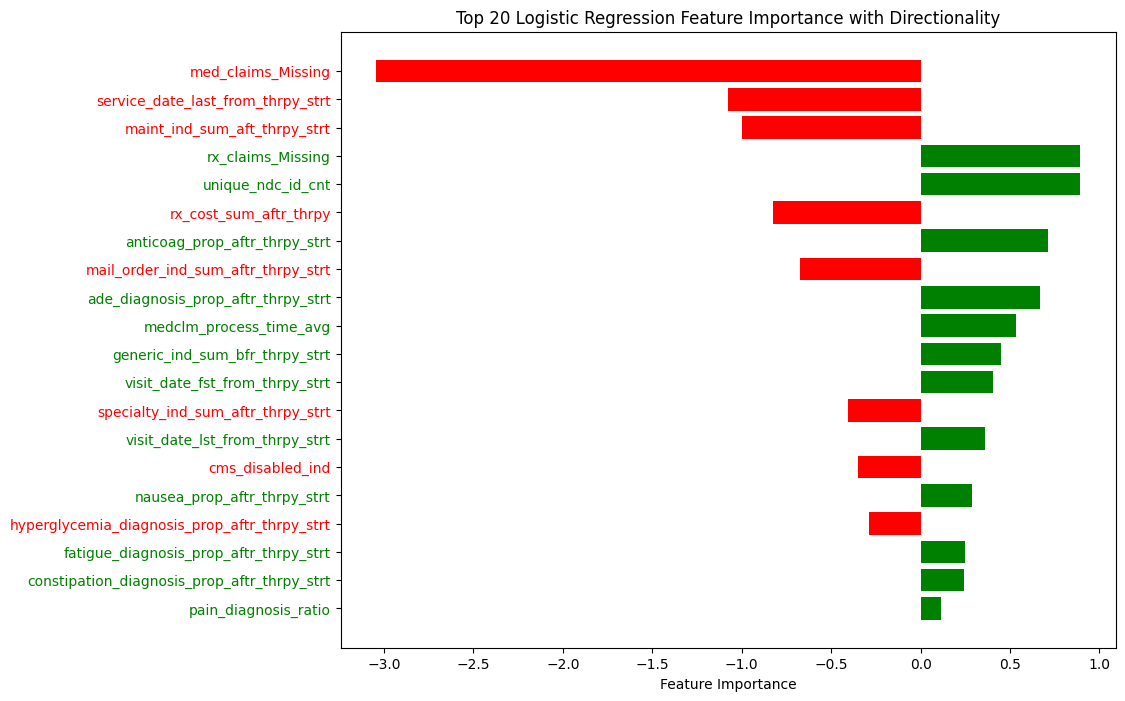

In [ ]:
# Get coefficients
coefs = refit_lr.coef_[0]
features = X_train_selected.columns

# Sort by importance and get top 20 indices
sorted_indices = np.argsort(np.abs(coefs))[-20:]

# Define colors based on the coefficients
colors = np.where(coefs[sorted_indices] >= 0, 'green', 'red')

# Plot
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_indices)), coefs[sorted_indices], align='center', color=colors)

# Set ytick labels with corresponding colors
yticks = plt.yticks(range(len(sorted_indices)), np.array(features)[sorted_indices])
for i, tick in enumerate(yticks[1]):
    tick.set_color(colors[i])

plt.xlabel('Feature Importance')
plt.title('Top 20 Logistic Regression Feature Importance with Directionality')
plt.show()

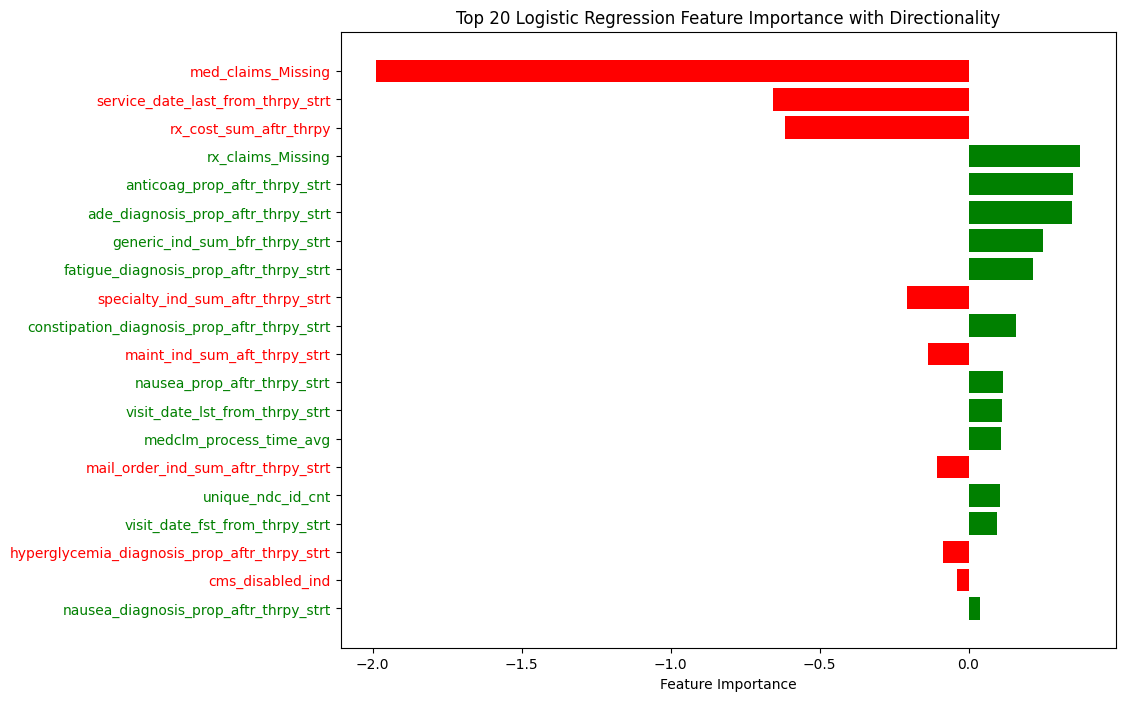

In [ ]:
# Get coefficients
coefs = clf.coef_[0]
features = X_train.columns

# Sort by importance and get top 20 indices
sorted_indices = np.argsort(np.abs(coefs))[-20:]

# Define colors based on the coefficients
colors = np.where(coefs[sorted_indices] >= 0, 'green', 'red')

# Plot
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_indices)), coefs[sorted_indices], align='center', color=colors)

# Set ytick labels with corresponding colors
yticks = plt.yticks(range(len(sorted_indices)), np.array(features)[sorted_indices])
for i, tick in enumerate(yticks[1]):
    tick.set_color(colors[i])

plt.xlabel('Feature Importance')
plt.title('Top 20 Logistic Regression Feature Importance with Directionality')
plt.show()

In [ ]:
np.array(features)[sorted_indices][::-1]

array(['med_claims_Missing', 'service_date_last_from_thrpy_strt',
       'rx_cost_sum_aftr_thrpy', 'rx_claims_Missing',
       'anticoag_prop_aftr_thrpy_strt',
       'ade_diagnosis_prop_aftr_thrpy_strt',
       'generic_ind_sum_bfr_thrpy_strt',
       'fatigue_diagnosis_prop_aftr_thrpy_strt',
       'specialty_ind_sum_aftr_thrpy_strt',
       'constipation_diagnosis_prop_aftr_thrpy_strt',
       'maint_ind_sum_aft_thrpy_strt', 'nausea_prop_aftr_thrpy_strt',
       'visit_date_lst_from_thrpy_strt', 'medclm_process_time_avg',
       'mail_order_ind_sum_aftr_thrpy_strt', 'unique_ndc_id_cnt',
       'visit_date_fst_from_thrpy_strt',
       'hyperglycemia_diagnosis_prop_aftr_thrpy_strt', 'cms_disabled_ind',
       'nausea_diagnosis_prop_aftr_thrpy_strt'], dtype=object)

### Feature Importance plot with directionality

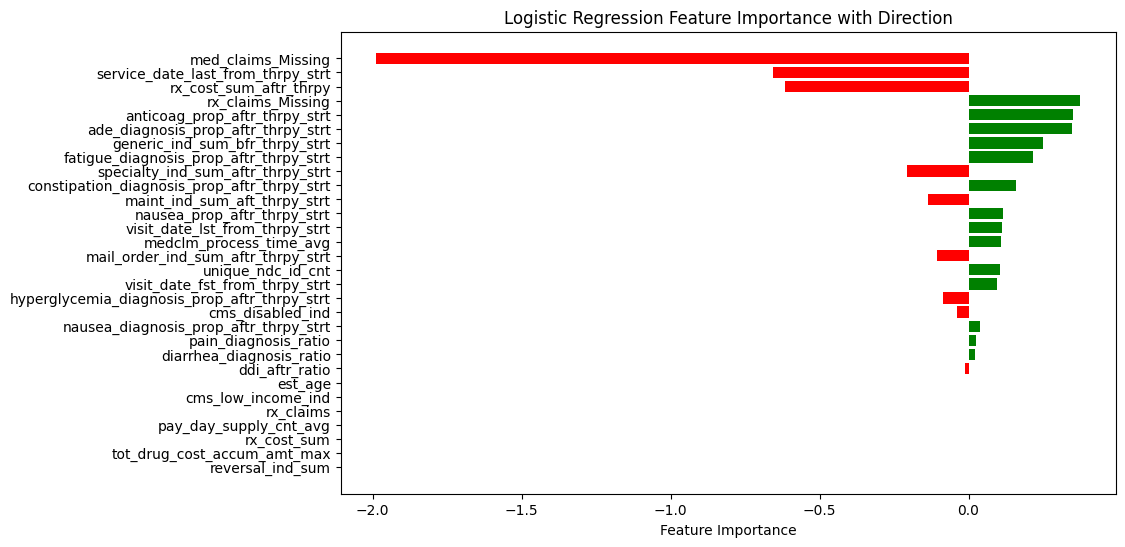

In [ ]:
# # Get feature coefficients and names
# coefficients = clf.coef_[0]
# feature_names = X_train.columns

# # Create a list of feature importance with directions
# feature_importance = list(zip(feature_names, coefficients))

# # Sort features by absolute coefficient values
# feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

# # Select the top 30 features
# feature_importance = feature_importance[:30]

# # Separate features and their directions
# sorted_features, sorted_directions = zip(*[(feat, direction) for feat, direction in feature_importance])

# # Create a bar plot of feature importance
# plt.figure(figsize=(10, 6))
# plt.barh(sorted_features, sorted_directions, color=[('green' if d > 0 else 'red') for d in sorted_directions])
# plt.xlabel('Feature Importance')
# plt.title('Logistic Regression Feature Importance with Direction')
# plt.gca().invert_yaxis()
# plt.show()

### Feature Importance plot without directionality

55
55


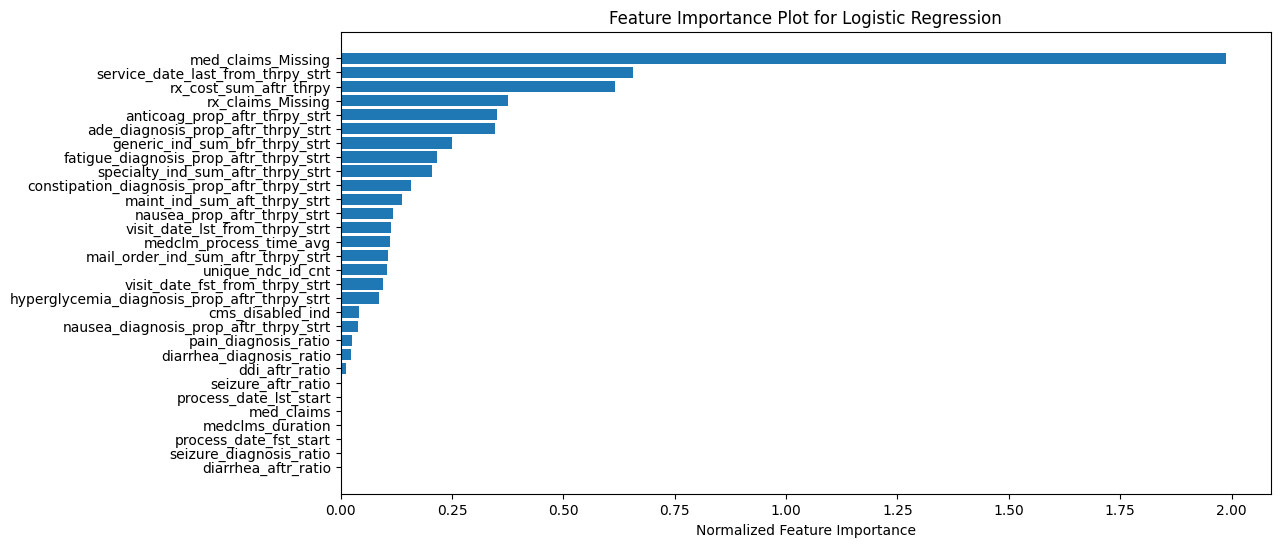

In [ ]:
# # Get feature importances (coefficients)
# feature_importance = np.abs(clf.coef_[0])

# # Get the column names from your DataFrame
# feature_names = X_train.columns
# print(len(feature_importance))
# print(len(feature_names))
# # Create a DataFrame to store feature names and their importances
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# # Sort the DataFrame by importance (in descending order)
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# # Select the top 30 features
# top_30_features = feature_importance_df.head(30)
# # Create a bar plot to visualize the feature importances
# plt.figure(figsize=(12, 6))
# plt.barh(range(len(top_30_features)), top_30_features['Importance'], align='center')
# plt.yticks(range(len(top_30_features)), top_30_features['Feature'])
# plt.xlabel('Normalized Feature Importance')
# plt.title('Feature Importance Plot for Logistic Regression')
# plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
# plt.show()

## Decision Tree - Not going ahead as it overfits

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# # Define the parameter grid for Grid Search
# param_grid = {
#     'max_depth': [ 10, 20, 30, 40, 50],  # Maximum depth of the tree
#     'min_samples_split': [ 5, 10, 15, 20, 30, 40],  # Minimum samples required to split a node
#     'min_samples_leaf': [2, 4, 10, 15],  # Minimum samples required for a leaf node
# }

# # Create a Decision Tree Classifier
# dt_classifier = DecisionTreeClassifier(random_state=42)

# # Initialize Grid Search with cross-validation
# grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid,scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

# # Fit the Grid Search to your data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)
# #for roc_auc - max_depth=10,min_samples_split=5,min_samples_leaf=10


# # clf = DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=4, random_state=42)  # You can specify other hyperparameters here
# clf = DecisionTreeClassifier(max_depth=20,min_samples_leaf=15,random_state=42)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# # Make predictions on the test set
# y_train_pred = clf.predict(X_train)
# y_test_pred = clf.predict(X_test)
# y_train_pred_prob = clf.predict_proba(X_train)[:, 1]
# y_test_pred_prob = clf.predict_proba(X_test)[:, 1]

# # Evaluate the classifier
# print(classification_report(y_train, y_train_pred))
# print(classification_report(y_test, y_test_pred))

# # Calculate ROC AUC score
# roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)
# roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)
# print("ROC AUC Score:", roc_auc_train)
# print("ROC AUC Score:", roc_auc_test)

# # Get feature importances
# feature_importances = clf.feature_importances_


# # Create a DataFrame to store feature names and their importances
# feature_names = X_train.columns
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# # Sort the DataFrame by importance in descending order
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Select the top 30 features
# top_30_features = feature_importance_df.head(30)

# # Plot the top 30 important features
# plt.figure(figsize=(12, 8))
# plt.barh(top_30_features['Feature'], top_30_features['Importance'])
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature Name')
# plt.title('Top 30 Important Features')
# plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
# plt.show()


## Random Forest

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [5, 10, 20, 50, 100, 200],
#     'max_depth': [5, 10, 20, 30],
#     # 'min_samples_split': [2, 5, 10],
#     # 'min_samples_leaf': [1, 2, 4],
# }

# rf_classifier = RandomForestClassifier( random_state=42)

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the grid search to your data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print(best_params)

In [ ]:
# # Train a Random Forest classifier
# clf = RandomForestClassifier( random_state=42) #, max_depth=30, n_estimators=100
# clf.fit(X_train, y_train)

# # Make predictions on the test set
# y_train_pred = clf.predict(X_train)
# y_test_pred = clf.predict(X_test)
# y_train_pred_prob = clf.predict_proba(X_train)[:, 1]
# y_test_pred_prob = clf.predict_proba(X_test)[:, 1]

# # Evaluate the classifier
# print(classification_report(y_train, y_train_pred))
# print(classification_report(y_test, y_test_pred))

# # Calculate ROC AUC score
# roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)
# roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)
# print("ROC AUC Score:", roc_auc_train)
# print("ROC AUC Score:", roc_auc_test)

In [ ]:
# # Get feature importances
# feature_importances = clf.feature_importances_


# # Create a DataFrame to store feature names and their importances
# feature_names = X_train.columns
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# # Sort the DataFrame by importance in descending order
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Select the top 30 features
# top_30_features = feature_importance_df.head(30)

# # Plot the top 30 important features
# plt.figure(figsize=(12, 8))
# plt.barh(top_30_features['Feature'], top_30_features['Importance'])
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature Name')
# plt.title('Top 30 Important Features')
# plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
# plt.show()


## XGBoost

In [ ]:
# import xgboost as xgb
# clf_xgb = xgb.XGBClassifier()
# clf_xgb.fit(X_train, y_train)

# # Make predictions on the test set
# y_train_pred = clf_xgb.predict(X_train)
# y_test_pred = clf_xgb.predict(X_test)
# y_train_pred_prob = clf_xgb.predict_proba(X_train)[:, 1]
# y_test_pred_prob = clf_xgb.predict_proba(X_test)[:, 1]

# # Evaluate the classifier
# print(classification_report(y_train, y_train_pred))
# print(classification_report(y_test, y_test_pred))

# # Calculate ROC AUC score
# roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)
# roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)
# print("ROC AUC Score:", roc_auc_train)
# print("ROC AUC Score:", roc_auc_test)

## Train final model on all the dataset

## Use final model to predict on holdout sample

###Heyy I added this :)

In [ ]:
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingClassifier

# clf = HistGradientBoostingClassifier()
# clf.fit(X_train, y_train)
# y_holdout_pred = clf.predict(df_holdout)

### c

In [ ]:
# predict using random forest model
# Make predictions on the holdout set
y_holdout_pred = clf.predict(df_holdout)
y_holdout_pred_prob = clf.predict_proba(df_holdout)[:, 1]

In [ ]:
print(y_holdout_pred.shape)
(y_holdout_pred==1).sum()/y_holdout_pred.shape[0]

(420,)


0.3738095238095238

In [ ]:
submission = pd.DataFrame({'ID': id, 'SCORE': y_holdout_pred_prob})

#create RANK column
submission['RANK'] = submission['SCORE'].rank(method = 'dense', ascending=False) - 1

In [ ]:
submission['SCORE'].values

array([0.85240453, 0.92785844, 0.53951664, 0.11890766, 0.04125016,
       0.02255937, 0.68307349, 0.88812584, 0.04269545, 0.01449706,
       0.84630263, 0.0416411 , 0.86710876, 0.0077838 , 0.02355721,
       0.89334487, 0.01495553, 0.0534022 , 0.85126701, 0.02765648,
       0.01504432, 0.02989714, 0.00352347, 0.71185842, 0.05593064,
       0.47007927, 0.06837393, 0.01102057, 0.03630726, 0.10902082,
       0.49381693, 0.57004167, 0.05026072, 0.01778252, 0.06294364,
       0.85358795, 0.82827615, 0.08609944, 0.05497923, 0.37292252,
       0.21375832, 0.11560575, 0.10087794, 0.04125016, 0.4298408 ,
       0.04583902, 0.01079032, 0.77617127, 0.37011739, 0.81907336,
       0.05314765, 0.83783955, 0.04683618, 0.83027777, 0.79724625,
       0.09080147, 0.04609849, 0.5935626 , 0.61556303, 0.56536025,
       0.6384745 , 0.52150285, 0.85389439, 0.48175566, 0.03843064,
       0.01998764, 0.09000435, 0.74140588, 0.52801988, 0.03022026,
       0.03157776, 0.06812675, 0.87731152, 0.04147112, 0.61567

In [ ]:
submission['RANK'].values

array([ 31.,   7., 150., 195., 297., 331., 121.,  18., 291., 349.,  38.,
       294.,  24., 366., 329.,  13., 348., 263.,  33., 324., 347., 320.,
       376., 106., 255., 161., 233., 358., 306., 203., 157., 145., 271.,
       338., 241.,  30.,  46., 215., 257., 175., 183., 197., 206., 297.,
       166., 285., 359.,  73., 176.,  53., 264.,  40., 281.,  43.,  65.,
       211., 284., 141., 137., 147., 131., 154.,  29., 159., 302., 334.,
       212.,  95., 153., 319., 316., 235.,  22., 295., 136., 113., 284.,
        94., 254.,  41., 286., 152., 200., 232.,  64., 259., 217., 156.,
       367.,   5.,  86.,  75., 341.,  57., 123., 284., 249., 108., 296.,
        42.,  99.,  32., 245., 255., 350.,  76., 250.,  80.,   4., 282.,
       177., 375., 199., 130., 293., 292., 284., 336., 232., 372., 277.,
       128., 284., 224., 214., 230.,  27., 247., 351., 251.,  93., 344.,
       357.,  10., 284., 225.,  39., 242., 135., 266., 198., 148., 346.,
       311., 373.,  17., 220., 275., 255., 284., 25

In [ ]:
submission.head(5)

,ID,SCORE,RANK
0,1018450235,0.852405,31.0
1,1032849118,0.927858,7.0
2,1044251683,0.539517,150.0
3,1086171816,0.118908,195.0
4,1093074743,0.041250,297.0


In [ ]:
submission.shape

(420, 3)

In [ ]:
# submission.to_csv('/content/drive/Shareddrives/Humana_mays_Competetion/Data/2023CaseCompetition_Geethasree_MadirajuNagaraju_20231006.csv',index=False)